In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
#from sklearn import metrics

In [2]:
df=pd.read_csv('housing.csv',index_col=0) #boston data set

In [3]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

In [4]:
df.tail()

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
502  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
503  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
504  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
505  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
506  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

      black  lstat  medv  
502  391.99   9.67  22.4  
503  396.90   9.08  20.6  
504  396.90   5.64  23.9  
505  393.45   6.48  22.0  
506  396.90   7.88  11.9

In [5]:
df.shape #outcome var is medv==price, it is given in thousand dollars unit

(506, 14)

In [6]:
#gogle for description of each variable

In [7]:
df.corr() #top 5--lstat,ptratio,rm,indus,age

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     black     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
black    0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

C:\Users\Ashok\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


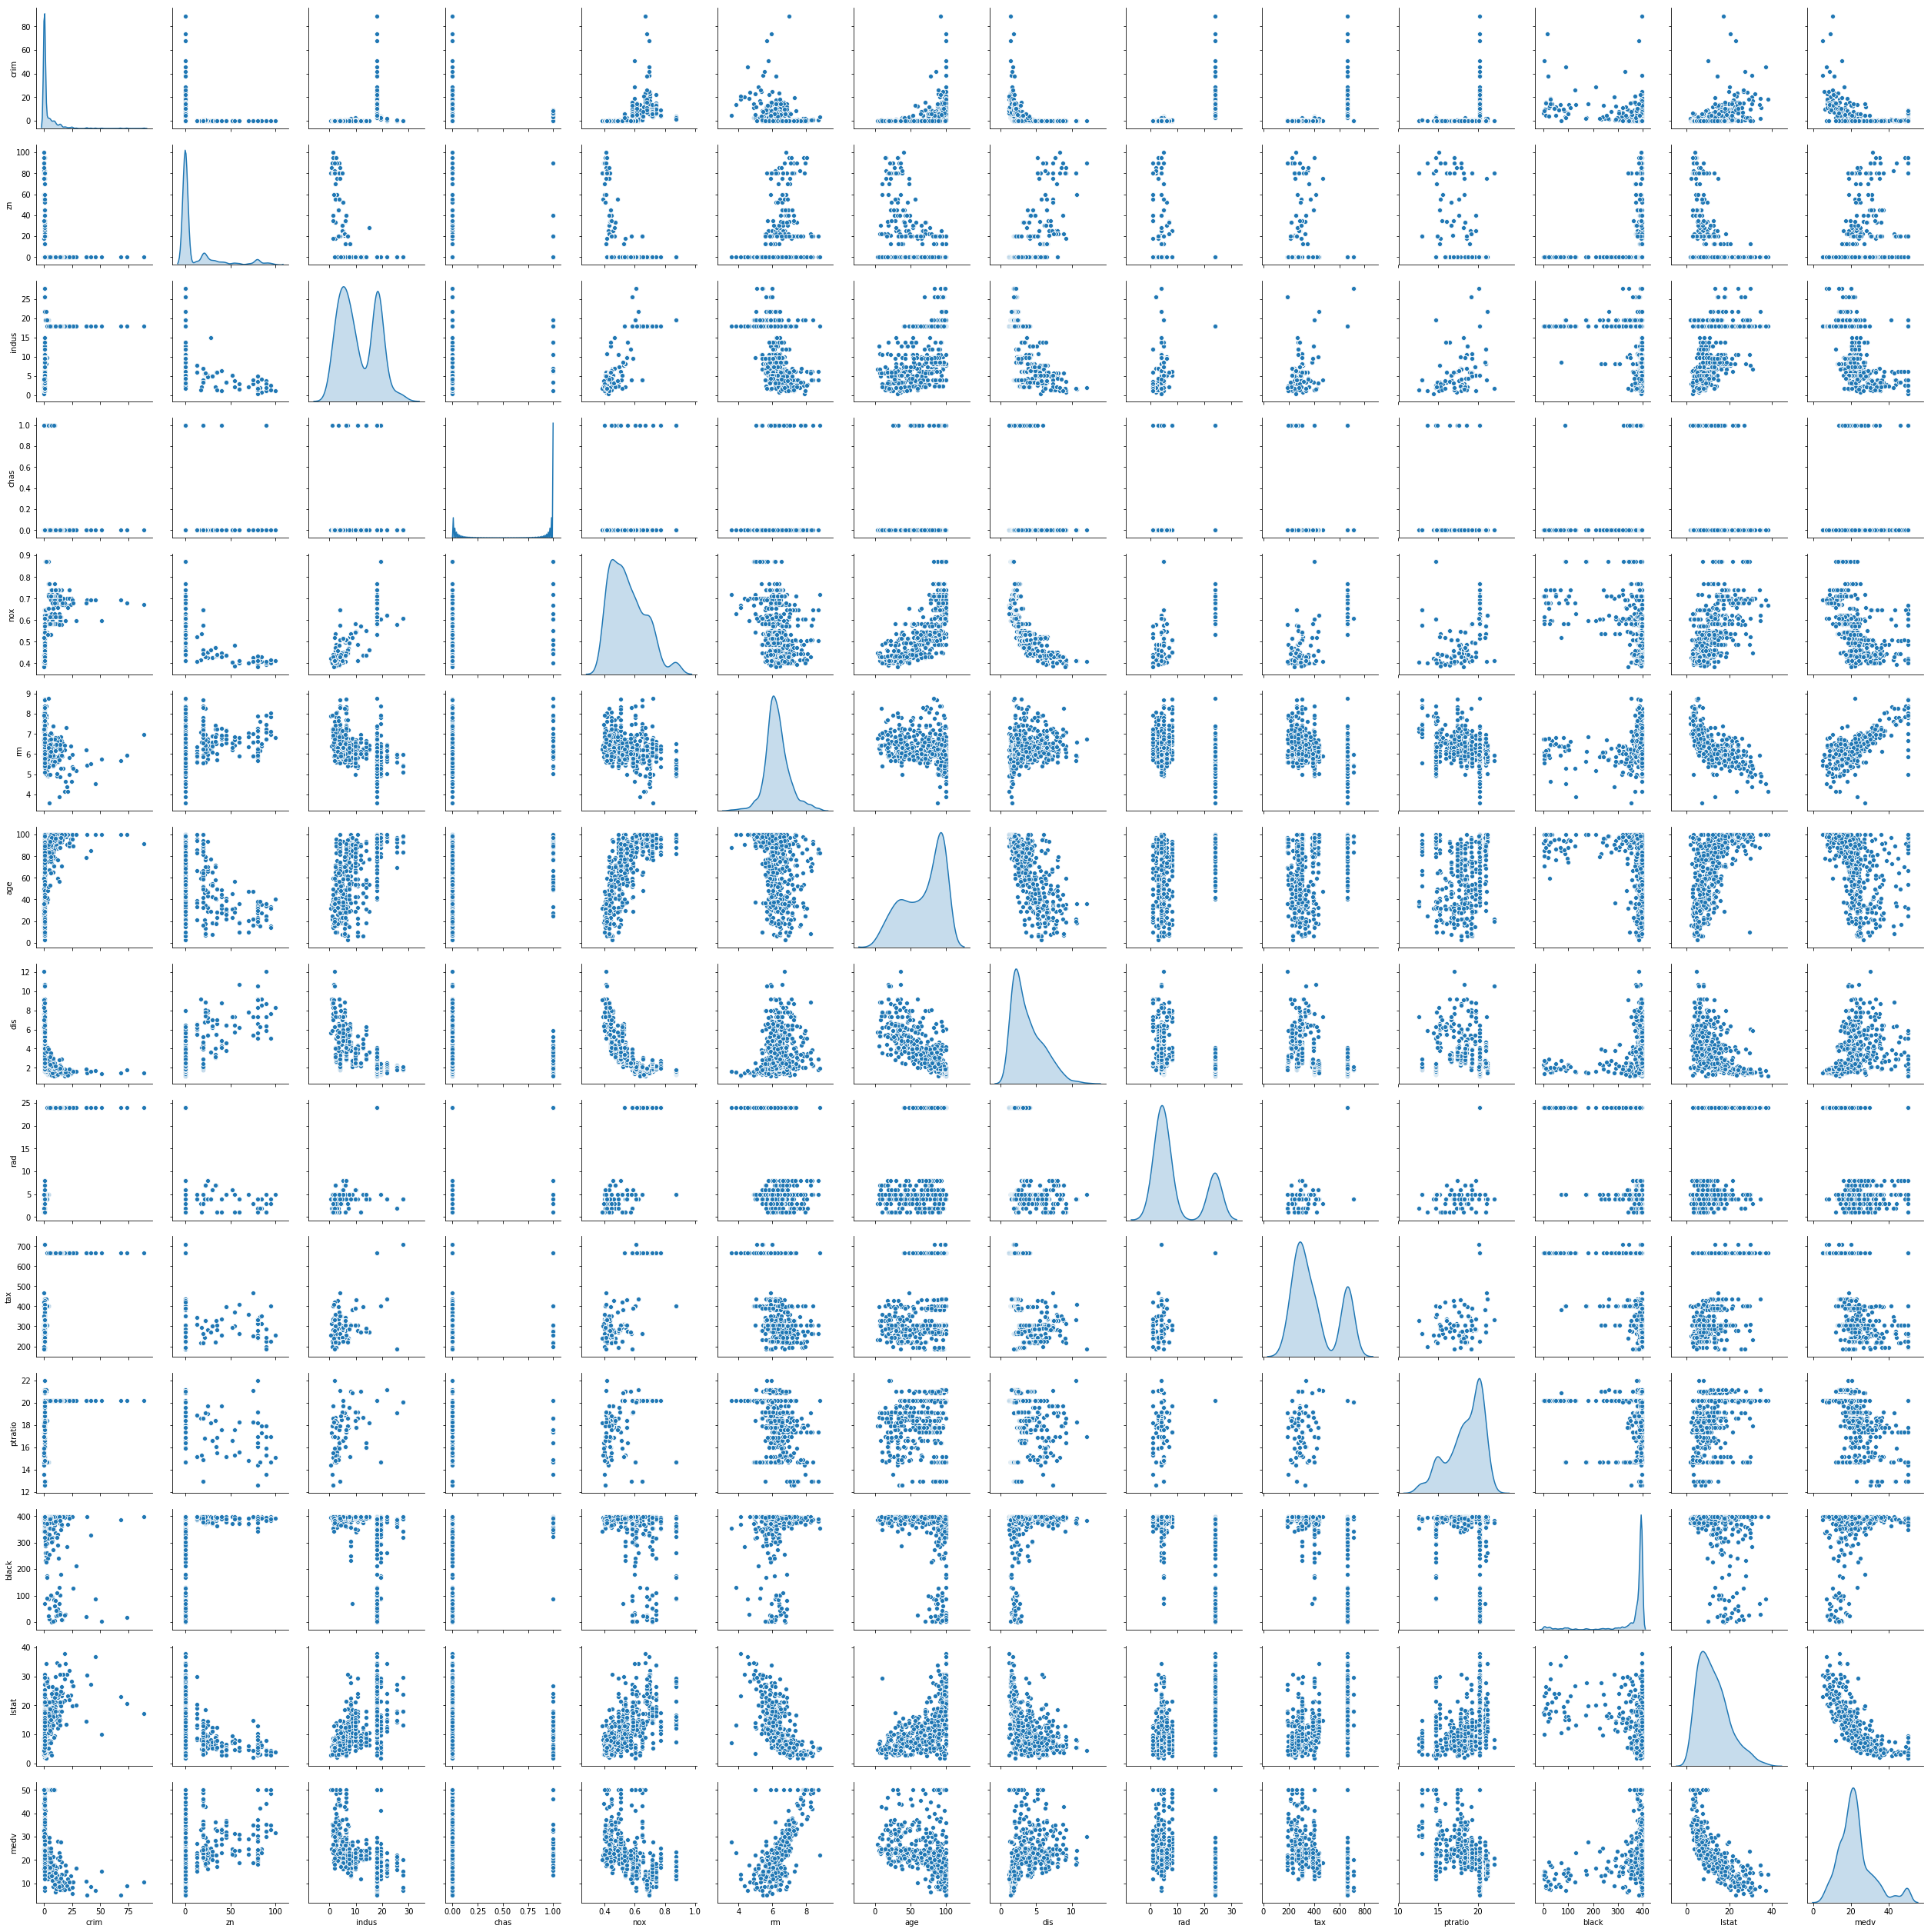

In [8]:
sns.pairplot(df,diag_kind='kde')

In [9]:
#dis with respect to medv is in funnel shape.This is called Hetero skedacit

In [10]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [11]:
model=smf.ols('medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat',df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        17:00:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#excpt indus and age all the variables are passing stat test

In [14]:
#compared to dis , age has more hetero skedacity

In [15]:
#top 5--lstat,ptratio,rm,indus,age=====indus and age will be removed now

In [16]:
#among lstat,ptratio,rm-----lstat graph is good(curv)i linear model

In [17]:
#########################################################

In [18]:
#linear model using lstat

In [19]:
X=df.drop(['medv','indus','age'],axis=1)
Y=df['medv']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
xtrain.head()

crim    zn  chas    nox     rm     dis  rad  tax  ptratio   black  \
14   0.62976   0.0     0  0.538  5.949  4.7075    4  307     21.0  396.90   
62   0.17171  25.0     0  0.453  5.966  6.8185    8  284     19.7  378.08   
378  9.82349   0.0     0  0.671  6.794  1.3580   24  666     20.2  396.90   
40   0.02763  75.0     0  0.428  6.595  5.4011    3  252     18.3  395.63   
366  4.55587   0.0     0  0.718  3.561  1.6132   24  666     20.2  354.70   

     lstat  
14    8.26  
62   14.44  
378  21.24  
40    4.32  
366   7.12

In [22]:
###univariate using only lstat##########

In [23]:
m1=LinearRegression()
m1.fit(xtrain[['lstat']],ytrain)
y_predict=m1.predict(xtest[['lstat']])

In [24]:
m1.score(xtest[['lstat']],ytest)

0.5349901044757203

In [25]:
m1.intercept_

34.22183685037716

In [26]:
m1.coef_

array([-0.9166916])

In [27]:
rmse=np.sqrt(np.mean((ytest-y_predict)**2))
rmse

6.528418144661058

In [28]:
#####################bi-variate model######

In [29]:
#will take next variable after lstat

In [30]:
m2=LinearRegression()
m2.fit(xtrain[['lstat','ptratio']],ytrain)
y1_predict=m2.predict(xtest[['lstat','ptratio']])

In [31]:
rmse=np.sqrt(np.mean((ytest-y1_predict)**2))
rmse

6.021130288603245

In [32]:
#bias error is dropped

In [33]:
######### 3 varaible+=======multivariate###

In [34]:
m3=LinearRegression()
m3.fit(xtrain[['lstat','ptratio','rm']],ytrain)
y2_predict=m3.predict(xtest[['lstat','ptratio','rm']])

In [35]:
rmse=np.sqrt(np.mean((ytest-y2_predict)**2))
rmse

5.039931488838319

In [36]:
#bias error is decreased , good improvement

In [37]:
###introducing non linearity by quardratic term#####

In [38]:
# by doing this we have to infer whether rmse drops by using quardratic####

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
Xtrain=xtrain[['lstat']] #identify on wch var we will be doing quadratic
#

In [41]:
########polynomial 2nd order########

In [42]:
qr1=PolynomialFeatures(degree=2)   #2 order 
x_qr1=qr1.fit_transform(Xtrain) #2d numpy array

In [43]:
x_qr1_df=pd.DataFrame(x_qr1)

In [44]:
x_qr1_df.head()

0      1         2
0  1.0   8.26   68.2276
1  1.0  14.44  208.5136
2  1.0  21.24  451.1376
3  1.0   4.32   18.6624
4  1.0   7.12   50.6944

In [45]:
x_qr1_df=x_qr1_df.drop(0,axis=1)

In [46]:
idx1=np.arange(xtrain.shape[0])#ytrain is reindexed now from 0

In [47]:
ytrain.index=idx1

In [48]:
x_qr1_df.tail()

1         2
349   9.25   85.5625
350   5.52   30.4704
351  19.37  375.1969
352  10.88  118.3744
353   8.77   76.9129

In [49]:
x_qr1_df=pd.concat([x_qr1_df,ytrain],axis=1)

In [50]:
x_qr1_df.shape

(354, 3)

In [51]:
x_qr1_df.tail()

1         2  medv
349   9.25   85.5625  20.9
350   5.52   30.4704  22.8
351  19.37  375.1969  12.5
352  10.88  118.3744  24.0
353   8.77   76.9129  21.0

In [52]:
x_qr1_df.columns=['f1','f2','medv']    ## [3.09PM]

In [53]:
x_qr1_df.head()

f1        f2  medv
0   8.26   68.2276  20.4
1  14.44  208.5136  16.0
2  21.24  451.1376  13.3
3   4.32   18.6624  30.8
4   7.12   50.6944  27.5

In [54]:
mdf1=smf.ols('medv~f1+f2',x_qr1_df).fit()  ##same linear regression, but with second order

In [55]:
mdf1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     325.2
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           1.25e-80
Time:                        17:00:33   Log-Likelihood:                -1095.0
No. Observations:                 354   AIC:                             2196.
Df Residuals:                     351   BIC:                             2208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6002      1.011     42.153      0.000      40.613      44.588
f1            -2.2737      0.139    -16.309      0.000      -2.548      -2.000
f2             0.0417      0.004     10.142      0.000       0.034       0.050
==============================================================================
Omnibus:                       84.846   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.503
Skew:                           1.161   Prob(JB):                     5.30e-46
Kurtosis:                       5.957   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#for 2nd order p value is less than 0.05, so we check for higher order

In [57]:
qr2=PolynomialFeatures(degree=6)   #6 order 
x_qr2=qr2.fit_transform(Xtrain) #2d numpy array

In [58]:
x_qr2_df=pd.DataFrame(x_qr2)

In [59]:
x_qr2_df.head()

0      1         2            3              4             5  \
0  1.0   8.26   68.2276   563.559976    4655.005402  3.845034e+04   
1  1.0  14.44  208.5136  3010.936384   43477.921385  6.278212e+05   
2  1.0  21.24  451.1376  9582.162624  203525.134134  4.322874e+06   
3  1.0   4.32   18.6624    80.621568     348.285174  1.504592e+03   
4  1.0   7.12   50.6944   360.944128    2569.922191  1.829785e+04   

              6  
0  3.175998e+05  
1  9.065738e+06  
2  9.181784e+07  
3  6.499837e+03  
4  1.302807e+05

In [60]:
x_qr2_df=x_qr2_df.drop(0,axis=1)

In [61]:
idx2=np.arange(xtrain.shape[0]) #ytrain is reindexed now from 0

In [62]:
ytrain.index=idx2

In [63]:
x_qr2_df.tail()

1         2            3              4             5             6
349   9.25   85.5625   791.453125    7320.941406  6.771871e+04  6.263980e+05
350   5.52   30.4704   168.196608     928.445276  5.125018e+03  2.829010e+04
351  19.37  375.1969  7267.563953  140772.713770  2.726767e+06  5.281749e+07
352  10.88  118.3744  1287.913472   14012.498575  1.524560e+05  1.658721e+06
353   8.77   76.9129   674.526133    5915.594186  5.187976e+04  4.549855e+05

In [64]:
x_qr2_df=pd.concat([x_qr2_df,ytrain],axis=1)

In [65]:
x_qr2_df.shape

(354, 7)

In [66]:
x_qr2_df.columns=['f1','f2','f3','f4','f5','f6','medv']    ## [3.09PM]

In [67]:
x_qr2_df.head()

f1        f2           f3             f4            f5            f6  \
0   8.26   68.2276   563.559976    4655.005402  3.845034e+04  3.175998e+05   
1  14.44  208.5136  3010.936384   43477.921385  6.278212e+05  9.065738e+06   
2  21.24  451.1376  9582.162624  203525.134134  4.322874e+06  9.181784e+07   
3   4.32   18.6624    80.621568     348.285174  1.504592e+03  6.499837e+03   
4   7.12   50.6944   360.944128    2569.922191  1.829785e+04  1.302807e+05   

   medv  
0  20.4  
1  16.0  
2  13.3  
3  30.8  
4  27.5

In [68]:
mdf2=smf.ols('medv~f1+f2+f3+f4+f5+f6',x_qr2_df).fit()  ##same linear regression, but with sixth order

In [69]:
mdf2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           9.06e-88
Time:                        17:00:35   Log-Likelihood:                -1067.0
No. Observations:                 354   AIC:                             2148.
Df Residuals:                     347   BIC:                             2175.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.3754      7.141     11.116      0.000      65.331      93.420
f1           -17.9055      3.693     -4.848      0.000     -25.169     -10.642
f2             2.3517      0.693      3.393      0.001       0.988       3.715
f3            -0.1618      0.062     -2.625      0.009      -0.283      -0.041
f4             0.0059      0.003      2.108      0.036       0.000       0.011
f5            -0.0001   6.21e-05     -1.731      0.084      -0.000    1.46e-05
f6          7.781e-07   5.36e-07      1.451      0.148   -2.77e-07    1.83e-06
==============================================================================
Omnibus:                      115.398   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.011
Skew:                           1.342   Prob(JB):                    4.38e-109
Kurtosis:                       8.161   Cond. No.                     9.45e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#from 6th order we came to know that after order 4, the p value fails, hence lstat can take only 4th order

In [71]:
#####quadratic regression model####

In [72]:
qr=PolynomialFeatures(degree=4)   #4 order 
x_qr=qr.fit_transform(Xtrain) #2d numpy array

In [73]:
type(x_qr)

numpy.ndarray

In [74]:
x_qr_df=pd.DataFrame(x_qr)

In [75]:
x_qr_df.head() #col 0 is not needed   ,1 is lstat, 2 is lstat*lstat

0      1         2            3              4
0  1.0   8.26   68.2276   563.559976    4655.005402
1  1.0  14.44  208.5136  3010.936384   43477.921385
2  1.0  21.24  451.1376  9582.162624  203525.134134
3  1.0   4.32   18.6624    80.621568     348.285174
4  1.0   7.12   50.6944   360.944128    2569.922191

In [76]:
#z score  is same as standard scalar

In [77]:
#sc=Stanardscalar()
#sc.fit_transform(x)   # entire data will get standardised

In [78]:
x_qr_df=x_qr_df.drop(0,axis=1)

In [79]:
ytrain.head()

0    20.4
1    16.0
2    13.3
3    30.8
4    27.5
Name: medv, dtype: float64

In [80]:
x_qr_df.shape

(354, 4)

In [81]:
idx=np.arange(xtrain.shape[0]) #ytrain is reindexed now from 0

In [82]:
ytrain.index=idx

In [83]:
x_qr_df.tail()

1         2            3              4
349   9.25   85.5625   791.453125    7320.941406
350   5.52   30.4704   168.196608     928.445276
351  19.37  375.1969  7267.563953  140772.713770
352  10.88  118.3744  1287.913472   14012.498575
353   8.77   76.9129   674.526133    5915.594186

In [84]:
#update the df with y variable

In [85]:
x_qr_df=pd.concat([x_qr_df,ytrain],axis=1)

In [86]:
x_qr_df.shape

(354, 5)

In [87]:
x_qr_df.tail()

1         2            3              4  medv
349   9.25   85.5625   791.453125    7320.941406  20.9
350   5.52   30.4704   168.196608     928.445276  22.8
351  19.37  375.1969  7267.563953  140772.713770  12.5
352  10.88  118.3744  1287.913472   14012.498575  24.0
353   8.77   76.9129   674.526133    5915.594186  21.0

In [88]:
x_qr_df.columns=['f1','f2','f3','f4','medv']    ## [3.09PM]

In [89]:
x_qr_df.head()

f1        f2           f3             f4  medv
0   8.26   68.2276   563.559976    4655.005402  20.4
1  14.44  208.5136  3010.936384   43477.921385  16.0
2  21.24  451.1376  9582.162624  203525.134134  13.3
3   4.32   18.6624    80.621568     348.285174  30.8
4   7.12   50.6944   360.944128    2569.922191  27.5

In [90]:
####ols##

In [91]:
m5=smf.ols('medv~f1+f2+f3+f4',x_qr_df).fit()  ##same linear regression, but with forth order

In [92]:
m5.summary() #this is called 4th order polynomial regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           5.76e-87
Time:                        17:00:38   Log-Likelihood:                -1074.2
No. Observations:                 354   AIC:                             2158.
Df Residuals:                     349   BIC:                             2178.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.8626      2.719     21.647      0.000      53.515      64.211
f1            -7.5153      0.865     -8.685      0.000      -9.217      -5.813
f2             0.5425      0.088      6.191      0.000       0.370       0.715
f3            -0.0180      0.003     -5.209      0.000      -0.025      -0.011
f4             0.0002   4.59e-05      4.672      0.000       0.000       0.000
==============================================================================
Omnibus:                      101.674   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.245
Skew:                           1.213   Prob(JB):                     2.21e-84
Kurtosis:                       7.498   Cond. No.                     2.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
#similarly we ve to do for 3,4,5, order, at one point stat will reject at some point

In [94]:
#try degree 6  #this is called 6th order polynomial regression model  #in this check the pvalue for wch order it fails, in 
#this 5th order fails, hence we can go upto 4th order

In [95]:
#do for 4th order

In [96]:
#m5.predict(#here x test wch contains only 4th order, same process as xtrain)

In [97]:
Xtest=xtest[['lstat']]
#Xtest=xtest[['lstat','rm']] for lstat 4 order, rm 4 order

In [98]:
qr=PolynomialFeatures(degree=4)   #4 order 
Xtest=qr.fit_transform(Xtest) #2d numpy array

#interaction true in polynomial features, it is not adviseable, it makes the model complex

In [99]:
Xtest=pd.DataFrame(Xtest)
Xtest=Xtest.drop(0,axis=1)

In [100]:
Xtest.head()

1         2            3              4
0   7.53   56.7009   426.957777    3214.992061
1   7.18   51.5524   370.146232    2657.649946
2  18.80  353.4400  6644.672000  124919.833600
3   8.10   65.6100   531.441000    4304.672100
4  10.19  103.8361  1058.089859   10781.935663

In [101]:
Xtest.columns=['f1','f2','f3','f4']    ## [3.09PM]

In [102]:
m6=LinearRegression()
m6.fit(x_qr_df[['f1','f2','f3','f4']],ytrain)
y6_predict=m6.predict(Xtest)   #now passing the Xtest for prediction

In [103]:
rmse=np.sqrt(np.mean((ytest-y6_predict)**2))
rmse

5.752311630722162

In [104]:
#rmse is 5.75, hence multivariate is better than 4th order polynomial with lstat

In [105]:
#To reduce than 5 introduce rm order, ptratio order

In [106]:
#finally whcih model to choose, univariate, bi, multi, polynomial orders

In [107]:
#wch ever model has avg rmse, variance, we can take that model for production, decide using k-fold validation

In [108]:
#[3.31PM]

In [109]:
#############################################################################################################################

In [110]:
#so far lstat,ptratio,rm has the best rmse

In [111]:
############################################################################################################

In [112]:
#m1=6.52 #univa lstat
#m3=6.02 #lstat,ptratio
#m3=5.03 #lstat,ptratio,rm
#m6=5.75 #lstat poly
#m5=use all, except indus and age (already done)
#m5=4.43

In [113]:
##############

In [114]:
from sklearn import metrics ###for rmse

In [115]:
m5=metrics.mean_squared_error(ytest,y_predict) #will give meann square error

In [116]:
np.sqrt(m5) #rmse

6.528418144661057

In [117]:
####for all the variables####

In [118]:
m5=LinearRegression()
m5.fit(xtrain,ytrain)
y5_predict=m5.predict(xtest)

In [119]:
#rmse
m5=metrics.mean_squared_error(ytest,y_predict) #will give meann square error

In [120]:
np.sqrt(m5)

6.528418144661057

In [121]:
######ridge & lasso ####### its linar reg model with l1 norm or regularization
#after ridge and lasso rmse will shoot up

In [122]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [123]:
rd=Ridge(alpha=0.5,normalize=True)
Ls=Lasso(alpha=0.05,normalize=True)

In [124]:
rd.fit(xtrain,ytrain)
rd_predict=rd.predict(xtest)
Ls.fit(xtrain,ytrain)
Ls_predict=Ls.predict(xtest)

In [125]:
from sklearn.metrics import mean_squared_error
rd_rmse=np.sqrt(mean_squared_error(ytest,rd_predict))
rd_rmse #from 4.43 for all the variables, now using ridge rmse is increased

5.17290166386151

In [126]:
#lasso
rd_rmse=np.sqrt(mean_squared_error(ytest,Ls_predict))
rd_rmse

5.430066369201326

In [127]:
#what is the best alpha value, how to figure it out
#rd1=0.1 (alpha value)
#rd2=0.5 (alpha value)
#rd3=0.8 (alpha value)#bias erros will be high, variance is low

In [128]:
#use k fold validation

In [129]:
#compare the avg rmse, var, whose avg is high better bias error, whose var is high better variance error

In [130]:
rd.coef_  #compare the coef of 36 and ridge model

array([-6.21232110e-02,  2.53021356e-02,  2.42287254e+00, -7.37682910e+00,
        3.00611540e+00, -3.38250499e-01,  2.23228688e-02, -2.29328740e-03,
       -6.76718844e-01,  6.29397583e-03, -3.50624741e-01])

In [131]:
variables=X.columns

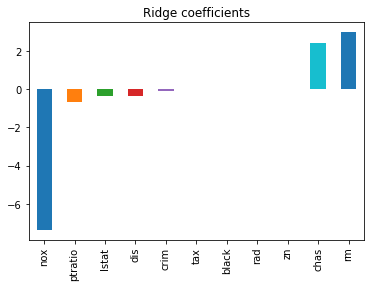

In [132]:
ridge_beta=pd.Series(rd.coef_,variables).sort_values() #visualize the coef in the form of bar plot
ridge_beta.plot(kind='bar',title='Ridge coefficients')

In [133]:
#tax,black,rad,zn are the weak variables ridge has controlled.

In [134]:
Ls.coef_

array([-0.        ,  0.        ,  0.19244044, -0.        ,  2.85714386,
       -0.        , -0.        , -0.        , -0.64744443,  0.        ,
       -0.54810532])

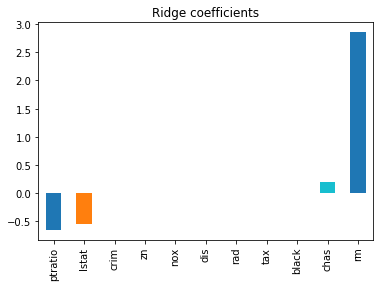

In [135]:
lasso_beta=pd.Series(Ls.coef_,variables).sort_values() #visualize the coef in the form of bar plot
lasso_beta.plot(kind='bar',title='Ridge coefficients')

In [136]:
#lasso has punished many variables, vry harsh regularization, this is not good coz too much reduction

In [137]:
#how to get it to sweet spot?? [4.37PM]

In [138]:
#.rank your model based on bias error and variance error, once ranked, map the graph